<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/04_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных. Matplotlib

# Почему важно смотреть на данные

![](https://alexanderdyakonov.files.wordpress.com/2017/11/d0bad180d0bed0bbd0b8d0ba_d183d182d0bad0b0.jpg)

Нельзя используя лишь статистические величины делать выводы о данных!

Пример - [Квартет Энскомба](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0):

In [ ]:
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    '1': (x, y1),
    '2': (x, y2),
    '3': (x, y3),
    '4': (x4, y4)
}

In [ ]:
for label, (x, y) in datasets.items():
    print(f"Dataset {label}: N={len(x)}, x_mean={np.mean(x):.3f}, y_mean={np.mean(y):.3f}, x_std={np.std(x):.3f}, y_std={np.std(y):.3f}, r={np.corrcoef(x, y)[0][1]:.3f}")

Dataset 1: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 2: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.937, r=0.816
Dataset 3: N=11, x_mean=9.000, y_mean=7.500, x_std=3.162, y_std=1.936, r=0.816
Dataset 4: N=11, x_mean=9.000, y_mean=7.501, x_std=3.162, y_std=1.936, r=0.817


Получили крайне близкие значения. Означает ли, что это наборы данных несут в себе одинаковые зависимости (выбраны из одного распределения)?

Посмотрим на график этих датасетов:

![](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/01/Anscombes_quartet_2.png)

Видим кардинально разные зависимости, у которых при этом одинаковые статистические величины. С ними нужно работать по разному:
- набор 1: хорошо описывается линейной зависимостью
- набор 2: плохо описывается линейной зависимостью, скорее всего полином (парабола, полином 2й степени)
- набор 3: явный выброс, который плохо описывается линейной зависимостью
- набор 4: еще один выброс в данных, плохо ложится на линейную зависимость

# Matplotlib

**Matplotlib** - Python-библиотека для двумерной графики, созданная в 2003 году как альтернатива платному MATLAB'y. Проект оказался настолько успешным, что matplotlib является стандартом для двумерной графики в анализе данных на python. Используя matplotlib можно нарисовать очень сложные графики, поэтому порог входа у него высокий. Для простых графиков есть удобные обертки, но кастомизация требует понимания деталей.

## 1. Введение

In [ ]:
import matplotlib as mpl  # стандартный алиас для matplotlib

Matplotlib состоит из множетства модулей и классов. Рисование в matplotlib состоит из последовательного нанесения объектов на холст. Объекты образуют иерархическую структуру. Задача пользователя описать эту структуру, а рисованием займется сама библиотека.

Рисунок в matplotlib имеет следующую структуру.
1. объект рисунок (Figure)
2. в рисунке - холст(Canvas)
3. на холсте - области рисования (Axes).
4. в областях рисования - элементы рисунка (Artists)

Обычные пользователи большую часть времени занимаются тем что работают с элементами рисунка располагая их в нужном порядке на областях рисования.

Элементы рисунка (Artists) можно разделить на две большие группы

 - **Примитивы** - простейшие элементы рисунка, такие как линии, прямоугольники, текст, изображения и т.д.
 - **Контейнеры** - рисунок (Figure), область рисования (Axes), координатные оси (Axis), деления на осях (Ticks).  

Библиотека манипулирует очень простыми графическими примитивами (линия, точка, отрезок, многоугольник).

Это совершенно неудобоно для людей - они мыслят высокоуровневыми абстракциями. Поэтому в matplotlib есть две обертки:
- **pylab** - "неудачный эксперимент", не используйте ее
- **pyplot** - "стандарт"

Подробнее про это - в [документации](https://matplotlib.org/2.0.2/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related).

In [ ]:
import matplotlib.pyplot as plt  # стандартный алиас для pyplot

Для того чтобы рисунки выводились в графический интерфейс надо вызвать [магическую команду](https://ipython.readthedocs.io/en/stable/interactive/magics.html) для jupyter

In [ ]:
# (!) С какого-то релиза стала необязательной
%matplotlib inline

Также нам очень пригодится библиотека numpy для работы с многомерными массивами. С ее помощью можно быстро поэлементно применять математические функции и генерировать массивы.

In [ ]:
import numpy as np

array: [4 5 1 4 2 4 4 5 0 2 1 0 4 3 5 5 3 2 0 0 2 1 3 0 3 1 5 5 5 4 3 1 0 1 1 2 0
 1 2 4 3 2 5 0 5 2 5 2 1 4 4 4 1 2 0 5 3 5 0 4 1 4 3 4 2 0 4 2 4 3 4 1 4 0
 4 0 5 0 0 2 0 4 4 1 4 5 1 0 5 5 3 2 0 5 4 3 4 2 0 5]


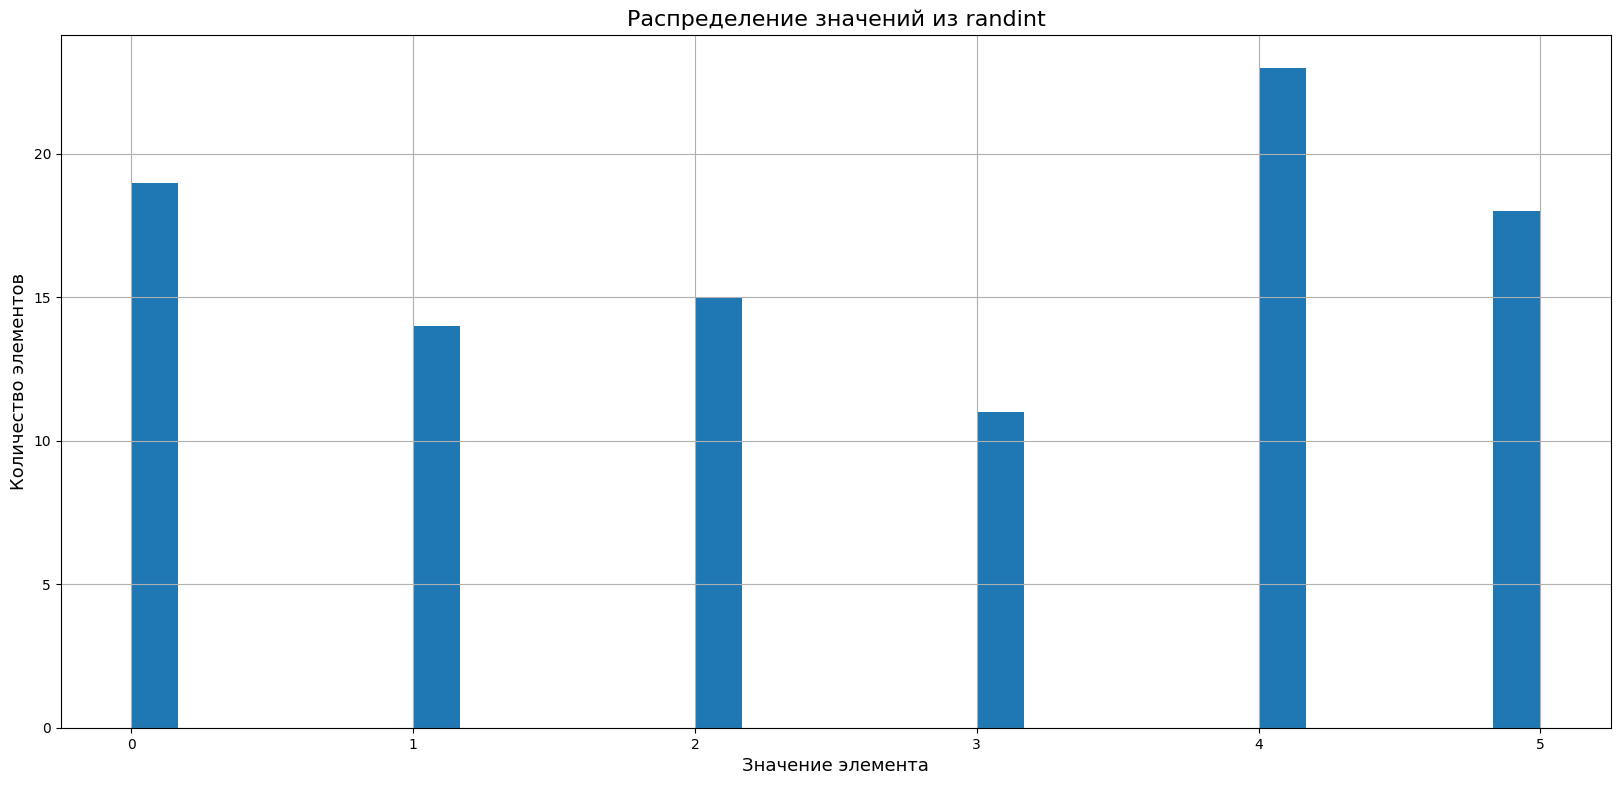

In [ ]:
# создать рисунок гистограммы из 20 рандомных целых чисел в диапазоне [0, 6)

array = np.random.randint(low=0, high=6, size=100)
print("array:", array)

# Задаем размер графика
plt.figure(figsize = (20, 9))

# Функция которая строить гистограму
plt.hist(
         array, # список элементов, частоты которого будут подсчитываться
         bins=30, # количество столбцов в графике
        )

# Подписать график
plt.title("Распределение значений из randint",fontsize=16)
# Подписать оси
plt.ylabel("Количество элементов", fontsize=13)
plt.xlabel("Значение элемента", fontsize=13)
# Показать сетку
plt.grid()
# Сохранить ПОСЛЕДНИЙ созданный рисунок
plt.savefig('hist.png')
# показать ВСЕ созданные рисунки
plt.show()

При вызове этих команд произошло приблизительно следующее:
1. Был создан рисунок (Figure).
2. В нем была создана одна область рисования (Axes).
3. На эту область были помещены оси X и Y (Axis) и 10 синих прямоугольников (Rectangle) 4 из которых нулевой высоты.
4. После этого у объекта рисунка вызвали методы savefig и show.

## 2. Основные функции модуля `matplotlib.pyplot`

Далее мы перечислим самые часто используемые функции из модуля matplotlib.pyplot. Примеры будут минималистичны, все настройки будут по умолчанию.

### 2.1 Примитивы

Отрисовка множества точек на графике. Aka scatter.

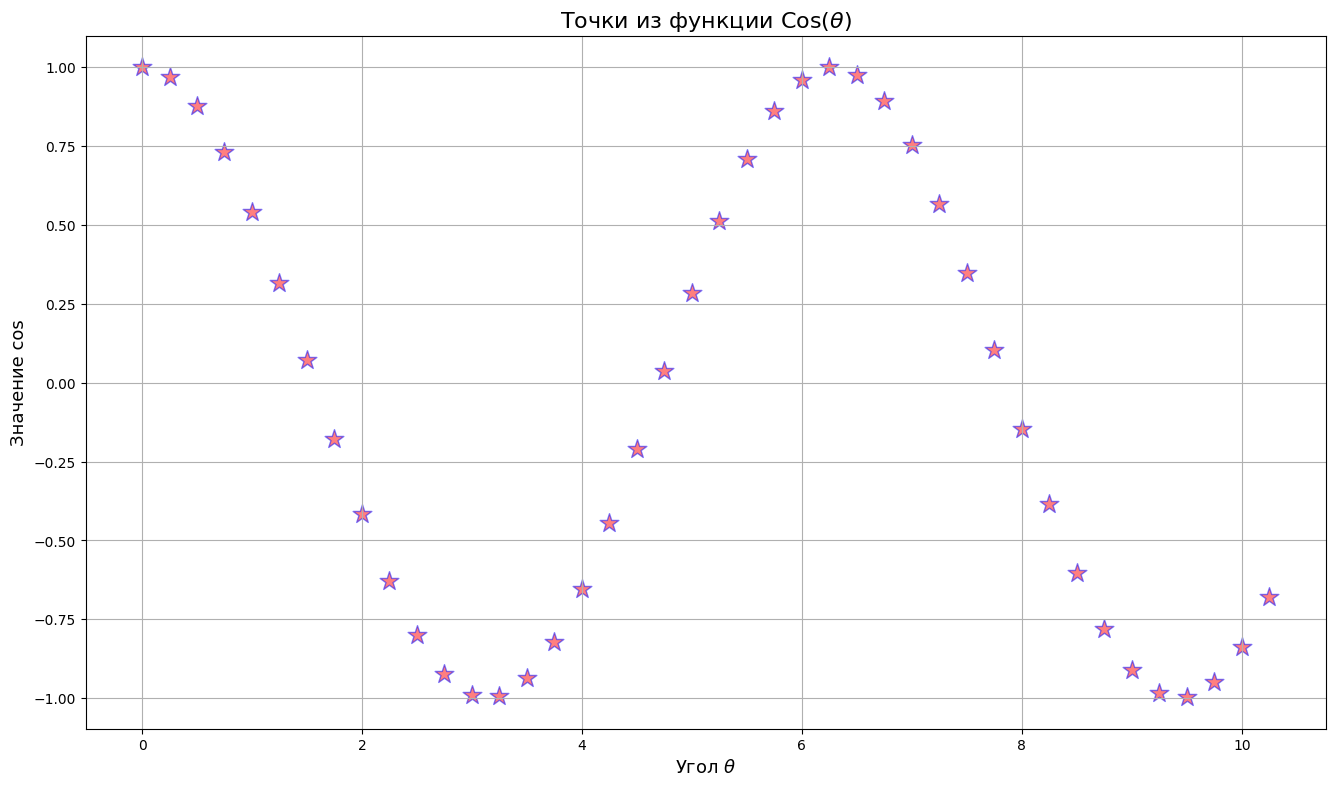

In [ ]:
# создать рисунок гистограммы из 20 рандомных целых чисел в диапазоне [0, 6)

x = np.arange(0, 10.5, 0.25)
y = np.cos(x)

# Задаем размер графика
plt.figure(figsize = (16, 9))

# Функция которая строить точки
plt.scatter(
            x, # значения оси абцисс
            y, # значения оси ординат
            s=200, # scale маштаб точек
            c='red', # color цвет точек
            marker='*', # тип точки
            alpha=0.5, # прозрачность точки
            edgecolors='blue', # цвет границы
           )

# Подписать график
plt.title("Точки из функции Cos($\\theta$)",fontsize=16)
# Подписать оси
plt.ylabel("Значение cos", fontsize=13)
plt.xlabel("Угол $\\theta$", fontsize=13) # отметим что можно использовать LATEX формулы
# Показать сетку
plt.grid()
# показать ВСЕ созданные рисунки
plt.show()

Ломаная линия:

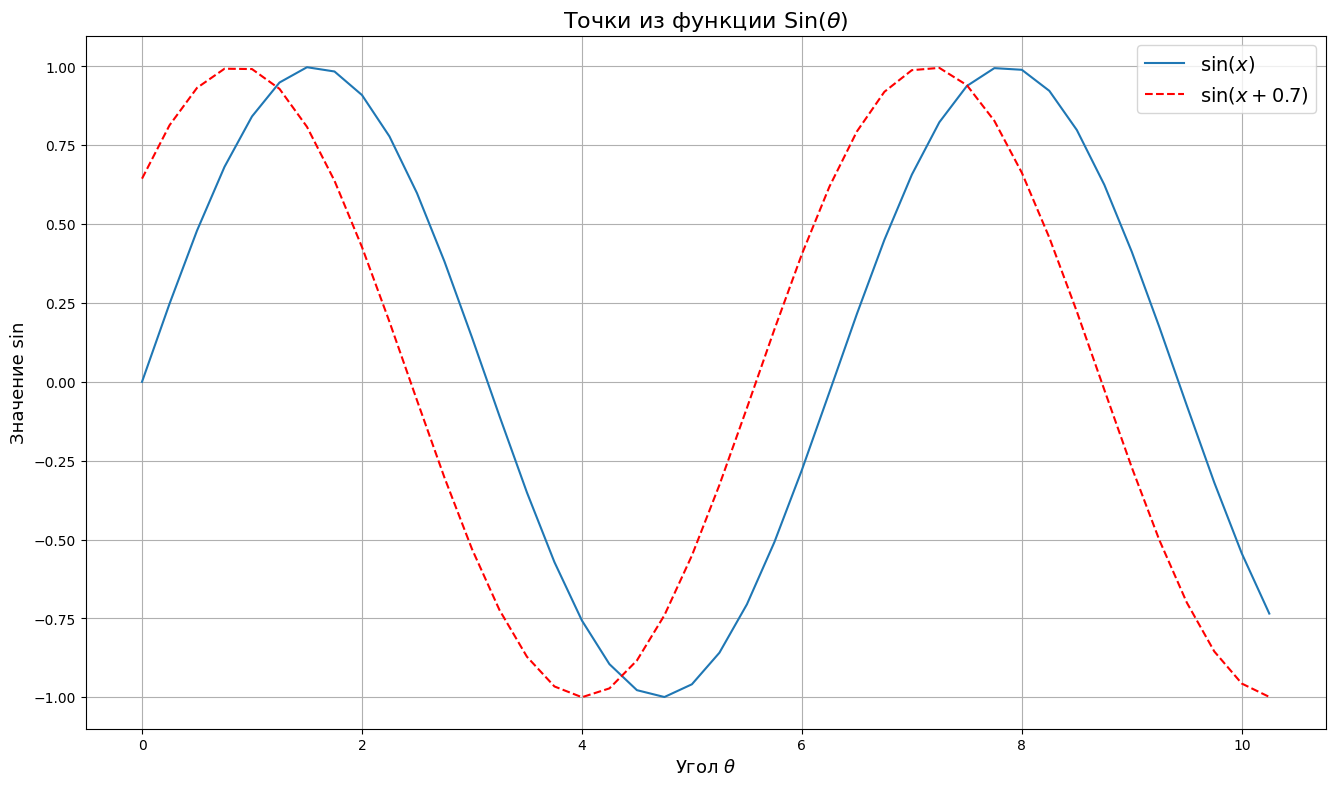

In [ ]:
plt.figure(figsize=(16,9))

plt.plot(
    x,  # абсциссы точек
    np.sin(x),  # ординаты точек
    label='$\\sin(x)$'
)


plt.plot(
    x,
    np.sin(x + 0.7),
    'r--',
    label='$\\sin(x + 0.7)$'
)

# установить легенду
plt.legend(fontsize=14)

# Подписать график
plt.title("Точки из функции Sin($\\theta$)",fontsize=16)
# Подписать оси
plt.ylabel("Значение sin", fontsize=13)
plt.xlabel("Угол $\\theta$", fontsize=13) # отметим что можно использовать LATEX формулы
# Показать сетку
plt.grid()
# показать ВСЕ созданные рисунки
plt.show()

Заплатки (патчи, [patches](https://matplotlib.org/3.1.1/api/patches_api.html)):

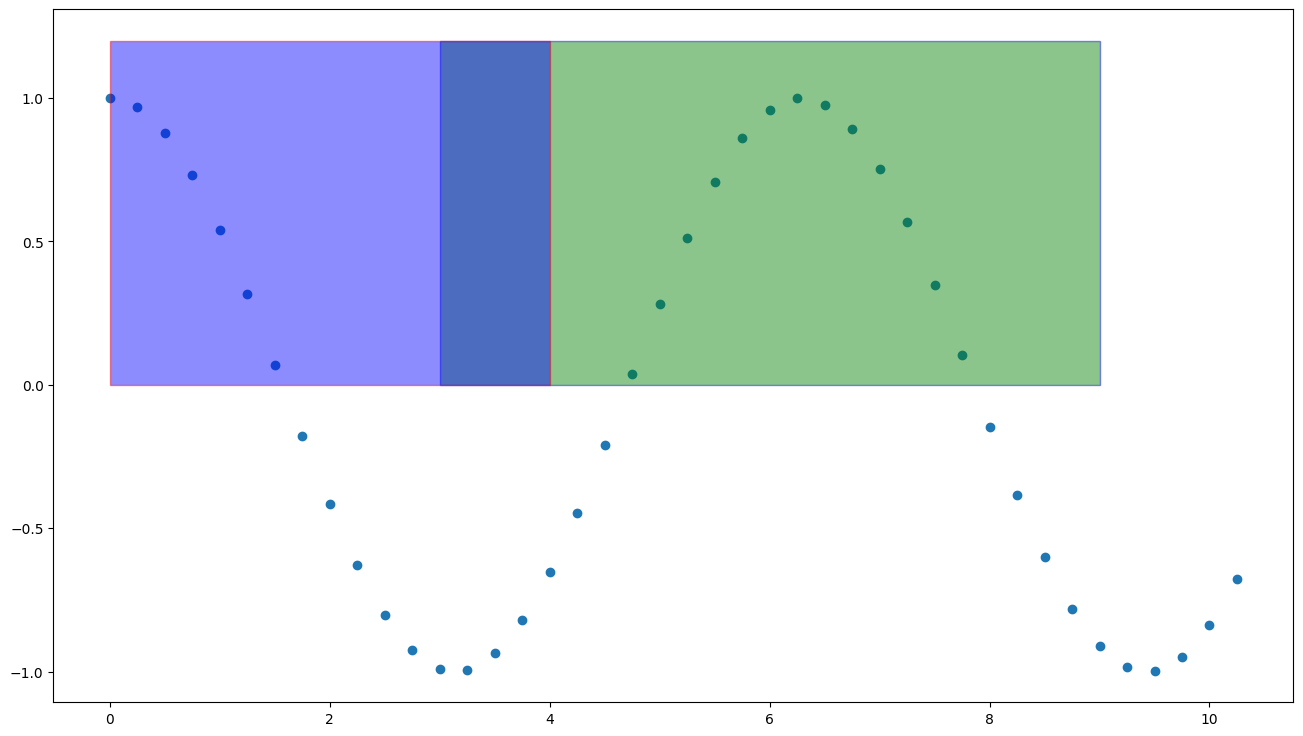

In [ ]:
import matplotlib.patches as mpatches


figure, ax = plt.subplots(1, figsize=(16,9))

# создаем объект заплатки
rect1 = mpatches.Rectangle(
                            (0, 0), # Координаты левого нижнего угла
                            4, # ширина
                            1.2, # высота
                            edgecolor='r', # цвет границы
                            facecolor="b", # цвет заливки
                            alpha=0.45
                          )
rect2 = mpatches.Rectangle((3, 0), 6, 1.2, edgecolor='b', facecolor="g", alpha=0.45)


ax.scatter(
    x, y
)

ax.add_patch(rect2)
ax.add_patch(rect1)


plt.show()

Текст:

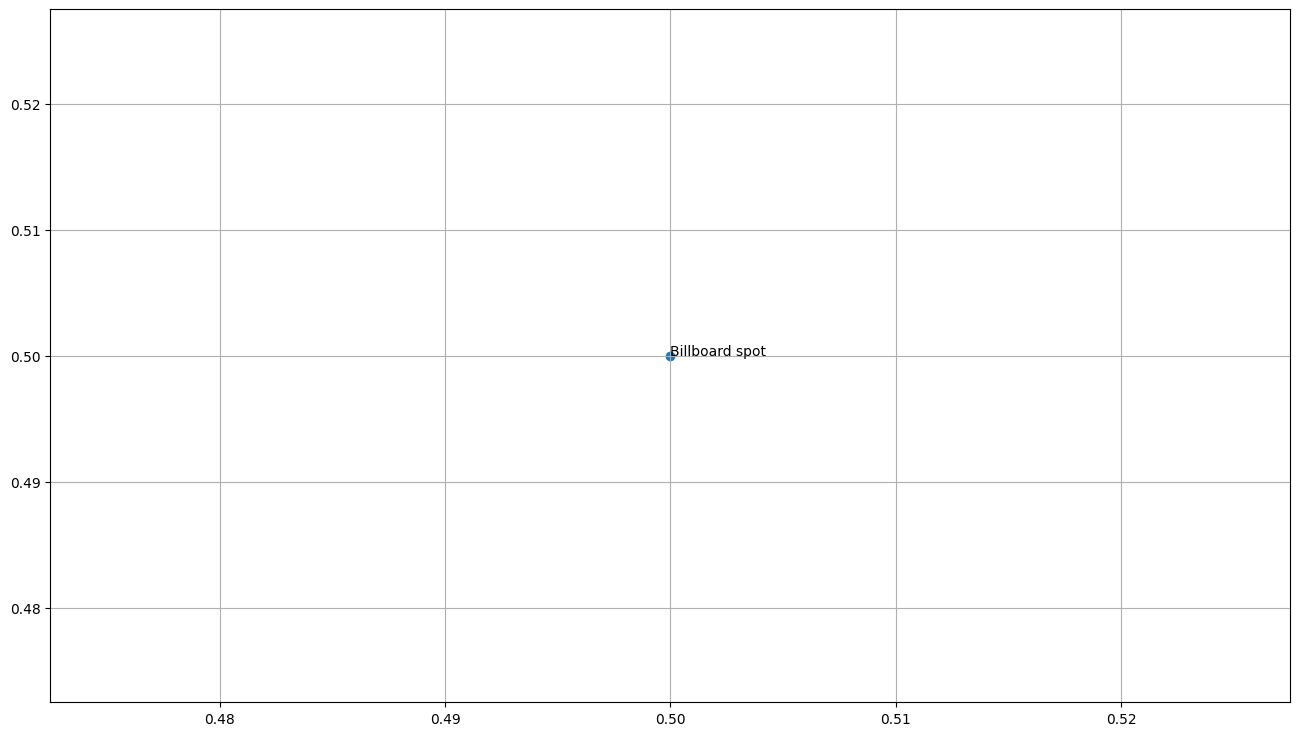

In [ ]:
plt.figure(figsize=(16,9))

plt.text(
    0.5,  # Абсцисса начала текста в координатах графика
    0.5,  # Ордината начала текста в координатах графика
    'Billboard spot'  # собственно ваш текст
)
plt.scatter(
    [0.5],
    [0.5]
)

plt.grid()
plt.show()

### 2.2. Диаграммы

Столбцовая диаграмма:

Text(0, 0.5, 'Count')

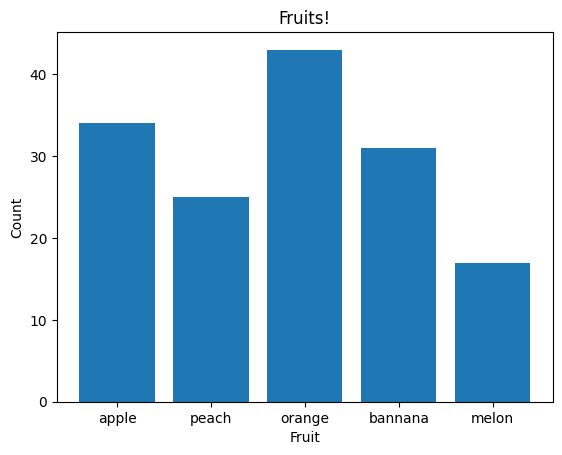

In [ ]:
fruits = ["apple", "peach", "orange", "bannana", "melon"]
counts = [34, 25, 43, 31, 17]

plt.bar(fruits, counts)

plt.title("Fruits!")
plt.xlabel("Fruit")
plt.ylabel("Count")

Гистограмма:

Круговая диаграмма:

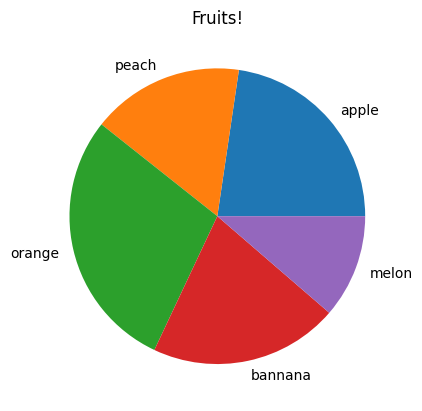

In [ ]:
plt.pie(
    counts,
    labels=fruits
)

plt.title("Fruits!")

plt.show()

[Ящик с усами](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8):
- ящик показывает диапазон от 25 до 75 квантиля (1й и 3й квартили)
- черта в ящике - медиана
- усы - квартили +- 1.5 межквартильного размаха (IQR)
- круглые точки - "выбросы"

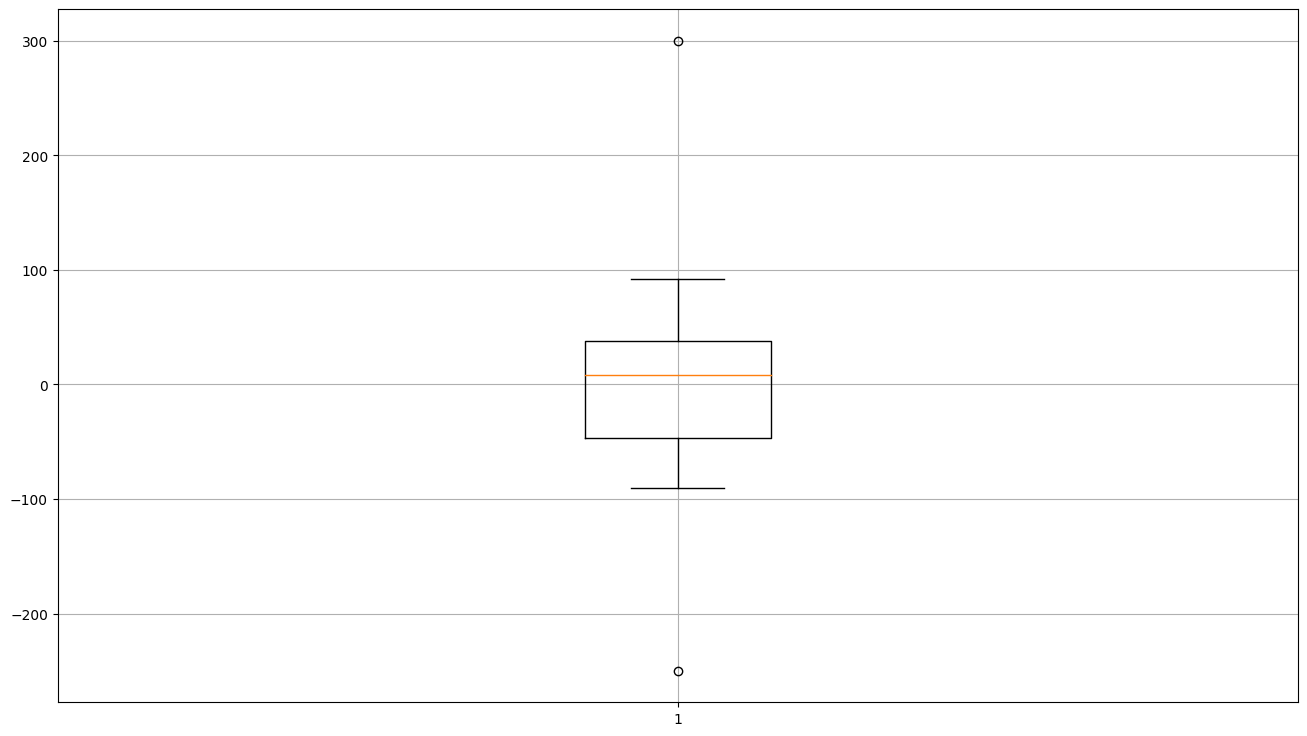

In [ ]:
sett = np.concatenate([np.random.randint(-100, 100, 50), np.array([-250, 300]) ])

plt.figure(figsize=(16,9))

plt.boxplot(sett)

plt.grid(True, which='both')
plt.show()

Ломаная с "крестами ошибок" - в каждой точке графика откладываются ошибки измерений по абсциссе и ординате:

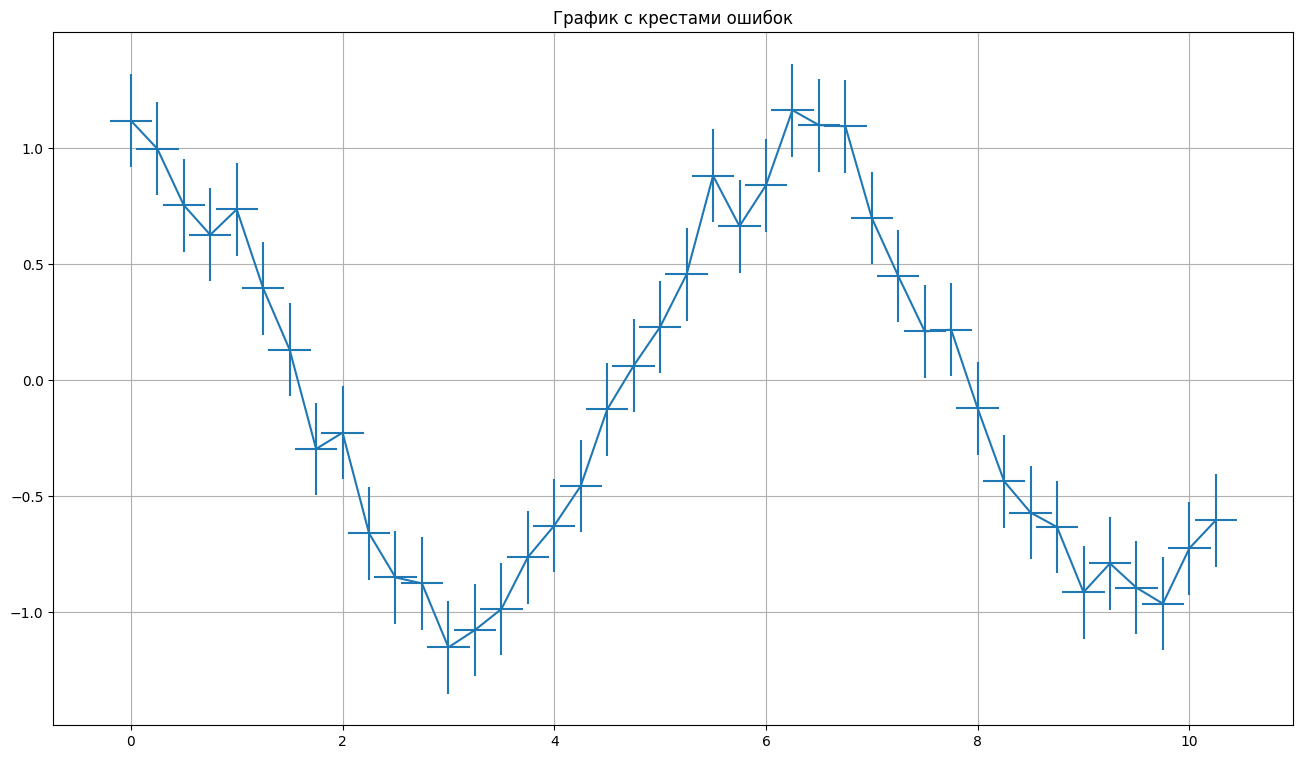

In [ ]:
plt.figure(figsize=(16,9))

plt.errorbar(
    x,  # абсциссы точек
    y + np.random.uniform(-0.2, 0.2, x.shape[0]),  # ординаты точек
    xerr=np.array([0.2] * x.shape[0]),  # ошибки расположения каждой точки по оси x
    yerr=np.array([0.2] * x.shape[0])  # ошибки расположения каждой точки по оси y
)

plt.title('График с крестами ошибок')
plt.grid()
plt.show()

## 3. Сложные примеры

### 3.1. Работа с текстом

Разберем пример показывающий какие элементы рисунка могут быть на области рисования и какие у них могут быть настройки. Мы нарисуем рисунок на котором будет
 - одна область рисования
 - заголовок рисунка
 - заголовок графика
 - график функции $\cos(x^2)$
 - аннотация
 - текст в рамке
 - подписи к осям X и Y
 - легенда
 - координатная сетка

Все именованные параметры функций являются опциональными. Поудаляйте их чтобы увидеть как по умолчанию отображаются эти элементы.

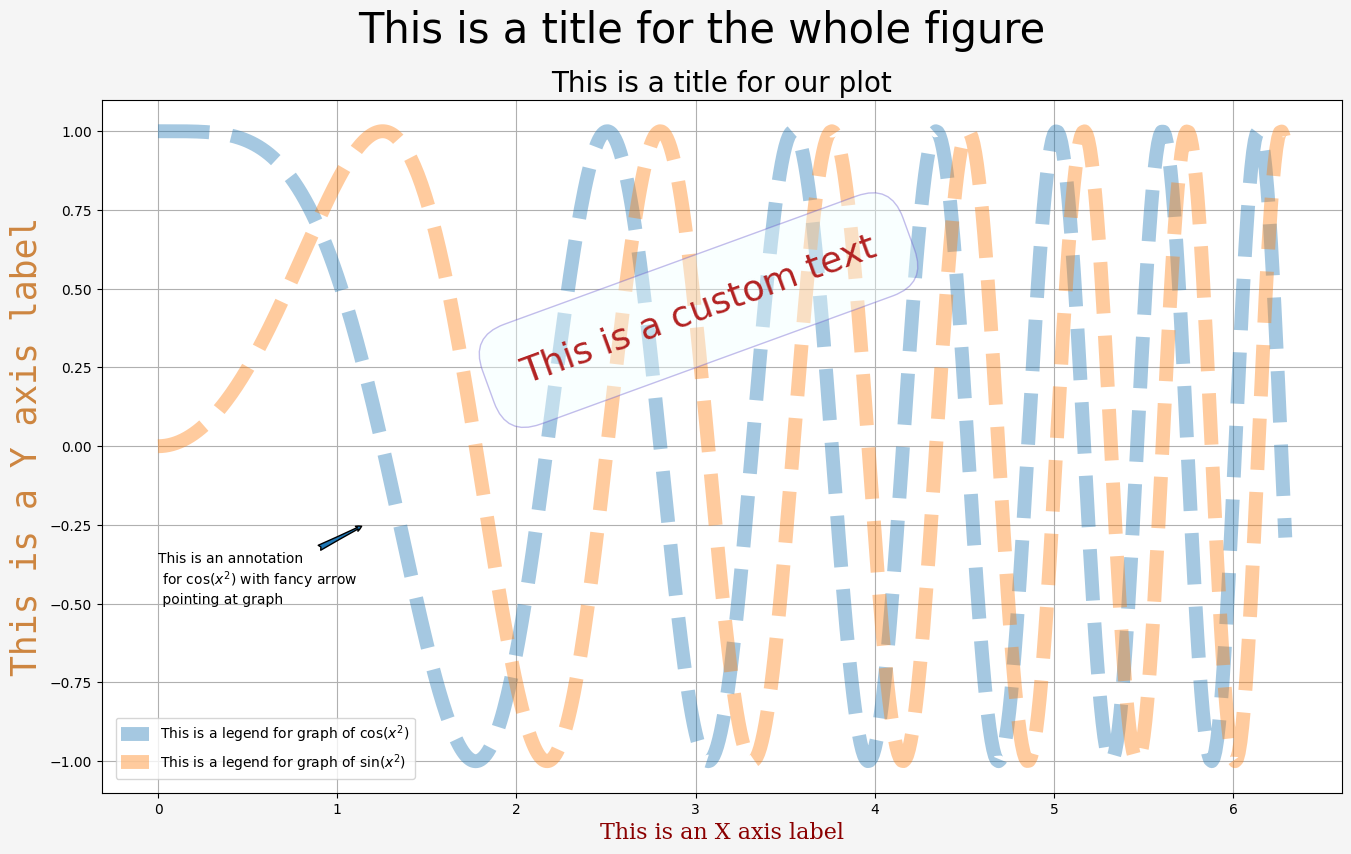

In [ ]:
#  Генерируем данные
step = 0.01
# создать массив чисел от 0 до 2pi с шагом 0.01
x = np.arange(0.0, 2*np.pi + step, step)
#  посчитать cos(x^2) от полученной сетки x'ов
y = np.cos(x * x)

# Создать рисунок
fig = plt.figure(
    figsize=(16, 9),  # размером 16 на 9 дюймов
    facecolor='whitesmoke',  # c подложкой цвета белый дым
    dpi=100  # разрешением 200 точек
)

# Добавить заголовок рисунка с 30-м шрифтом
plt.suptitle('This is a title for the whole figure', fontsize=30)

# Добавить заголовок графика
plt.title('This is a title for our plot', fontsize=20)

# Нарисовать cos(x^2)
plt.plot(
    x, y,
    #color='red',  # Цвет пурпурный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\cos(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

plt.plot(
    x, np.sin(x ** 2),
    #color='blue',  # Цвет пурпурный
    linestyle='--',  # Стиль - пунктирная линия
    alpha=0.4,  # Непрозрачность
    linewidth=10,  # Толщина
    label='This is a legend for graph of $\sin(x^2)$' # Подпись в легенде. Можно использовать TeX!
)

# Добавим аннотацию
plt.annotate(
    'This is an annotation\n for $\cos(x^2)$ with fancy arrow\n pointing at graph',
    xy=(1.15, -0.25),  #  точка куда будет указывать стрелка
    arrowprops=dict(arrowstyle='fancy'),
    xytext=(0, -0.5)  # расположение аннотации
)

# Поставить легенду
plt.legend(
    loc='lower left',  # Снизу слева
    borderaxespad=1  # С отступом 5 от осей
)

# Добавить подписи к осям X и Y
plt.xlabel(
    'This is an X axis label',  # Текст
    fontdict=dict(family='serif', color='darkred', weight='normal', size=16)  # Настройки шрифта
)
plt.ylabel(
    'This is a Y axis label',
    fontdict=dict(family='monospace', color='peru', weight='light', size=25)
)

# Добавить текст
plt.text(
    2.0, 0.2,  # Позиция начала текста
    'This is a custom text',  # Собственно сам текст
    fontsize=26,  # Размер шрифта
    color='firebrick',  # Цвет букв
    rotation=20,
    bbox=dict(  # Параметры рамки ограничивающей текст
        alpha=0.4, # Прозрачность фона рамки
        edgecolor='slateblue',  # цвет рамки
        facecolor='azure',  # цвет подложки
        pad=1., # отступ рамки от текст
        boxstyle='round'  # форма рамки
    )
)

# Добавить координатную сетку
# Получающиеся вертикальные линии это Xticks, а горизонтальные Yticks
plt.grid(True)

plt.show()
del step, x, y, fig

### 3.2. Полярные координаты

Область рисования может быть непрямоугольной, напрмер если вы используете полярные координаты. В этом случае вам придется самостоятельно создать область рисования. Мы создадим ее методом add_axes указав размеры прямоугольника в котором будет находится область рисования. Тут стоит сказать, что на рисунке действуют относительные координаты, в диапазоне от 0 до 1. В этом примере мы будем использовать более объектно ориентированный подход и будем вызывать методы объектов, а не функции модуля plt. Использовать функции модуля plt считается плохим тоном так как вы постоянно оперируете глобальным состоянием к которому еще и не имеете доступа.

In [ ]:
len(np.arange(0.0, 2 * np.pi + .01, .01))

630

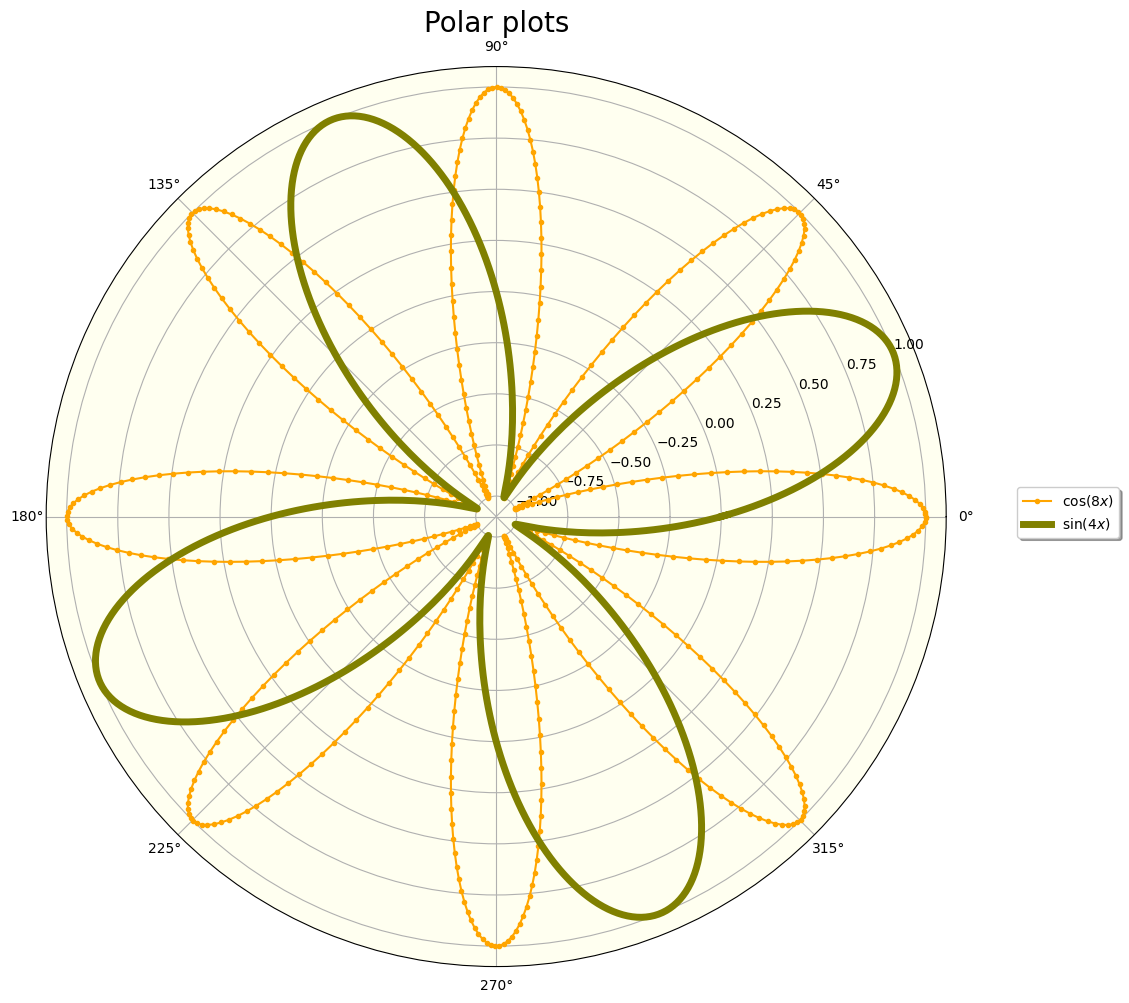

In [ ]:
# Готовим данные
step = 0.01
phi = np.arange(0.0, 2*np.pi + step, step)
rho1 = np.cos(8 * phi)
rho2 = np.sin(4 * phi)

fig = plt.figure(figsize=(16, 9))
# Создать область рисования для полярных координат с подложкой цвета слоновой кости :)
# Левый нижний угол будет в точке (0,0)
# Ширина и высота соответственно 1 и 1 (то есть на весь рисунок)
ax = fig.add_axes([0,0,1,1], polar=True, facecolor='ivory')

ax.set_title('Polar plots', fontsize=20)

ax.plot(
    phi, rho1,
    color='orange',
    marker='o',  # Добавить круглые метки в тех точках по которым строилась линия
    markersize=3,  #  Размер меток
    label='$\cos(8x)$'
)

ax.plot(
    phi, rho2,
    linewidth=5,
    color='olive',
    label='$\sin(4x)$'
)

# Раз мы указали label, то надо сделать легенду
ax.legend(
    bbox_to_anchor=(1.2, 0.54),  # кастомное положение легенды
    fancybox=True,
    shadow=True
)

ax.grid(True)

plt.show()
del step, phi, rho1, rho2, fig, ax

### 3.3. Разные типы графиков на одном рисунке

Мы нарисуем
 - набор случайных измерений функци $cos(x)$ к которому добавив белый шум с нулевым средним и дисперсией 0.25
 - собственно график cos(x)
 - и область в которой лежат изменения отстоящие не более чем на 1 сигму

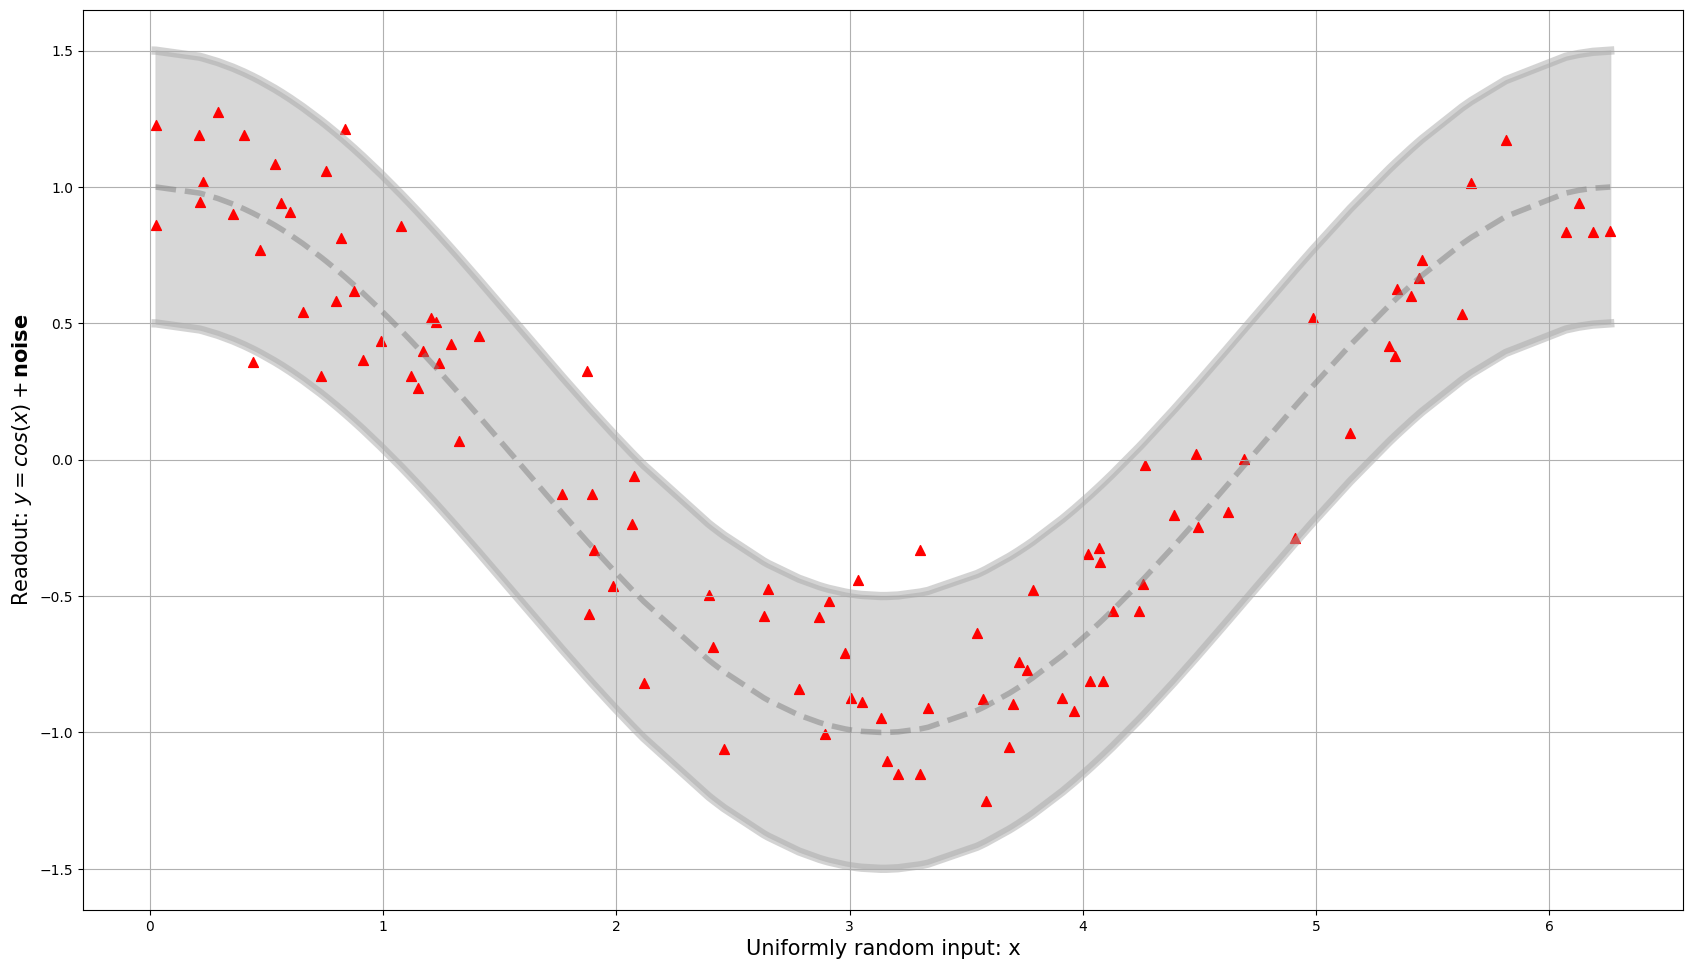

In [ ]:
# Готовим данные
scale = 0.5
n_points = 100
x = 2 * np.pi * np.sort(np.random.rand(n_points))
y = np.cos(x)
y_noise = y + np.random.normal(scale=0.25, size=n_points)

# Готовим рисунок
fig = plt.figure(figsize=(16, 9))
# Готовим область рисования.
ax = fig.add_axes([0, 0, 1, 1])

# График самой функции cos(x)
ax.plot(
    x, y,
    color='grey',
    linestyle='--',
    alpha=0.5,
    linewidth=4
)

# Графики отклоненний на 1 сигму
for shift in (scale, -scale):
    ax.plot(
        x, y + shift,
        alpha=0.5,
        color='darkgrey',
        linewidth=6
    )

# Сделаем заливку всего что находится между отклонениями
ax.fill_between(
    x, y - scale, y + scale,
    alpha=0.9,
    color='lightgrey',
)

# Собственно scatter plot
ax.scatter(
    x, y_noise,
    marker='^',  # Отмечаем точки треугольниками
    s=50,  # Размера 50
    color='red'  #  Красного цвета
)

# Подпишем оси
ax.set_xlabel('Uniformly random input: x', fontsize=15)
ax.set_ylabel('Readout: $y=cos(x)+\mathbf{noise}$', fontsize=15)

ax.grid(True)

plt.show()
del scale, n_points, x, y, y_noise, fig, ax

Как вы видели по последним примерам большая часть рисования происходит через работу с областью рисования (Axes). Этот объект-контейнер содержит в себе другие контейнеры и объекты-примитивы. Видно, что существует множество методов для создания и изменения свойств элементов рисунков и графических примитивов. Всё, что можно сделать через pyplot, можно сделать работая непосредственно с axes-экземплярами. Получаются такие соответствия:

Метод объекта Axes -> Краткое описание -> объект типа Artist создаваемый методом -> Контейнер в котором будет храниться Artist

    ax.annotate -> текстовая подпись -> Annotate -> ax.texts

    ax.text -> текст -> Text -> ax.texts

    ax.bar -> столбчатая диаграмма -> Rectangle -> ax.patches

    ax.errorbar -> график погрешностей -> Line2D и Rectangle -> ax.lines и ax.patches

    ax.fill -> заливка области -> Polygon -> ax.patches

    ax.hist -> гистограмма -> Rectangle -> ax.patches

    ax.imshow -> изображение -> AxesImage -> ax.images

    ax.legend -> легенда -> Legend -> ax.legends

    ax.plot -> XY график -> Line2D -> ax.lines

    ax.scatter -> точечная диаграмма -> PolygonCollection -> ax.collections


### 3.4. Несколько областей рисования

Зачастую необходимо расположить несколько областей на одном графике. Для этого надо создать несколько областей рисования и работать с каждой в отдельности. В следующем примере мы нарисуем график функции $x^2(2+\sin(1/x))$ и добавим еще одну область рисования для самой интересной части графика

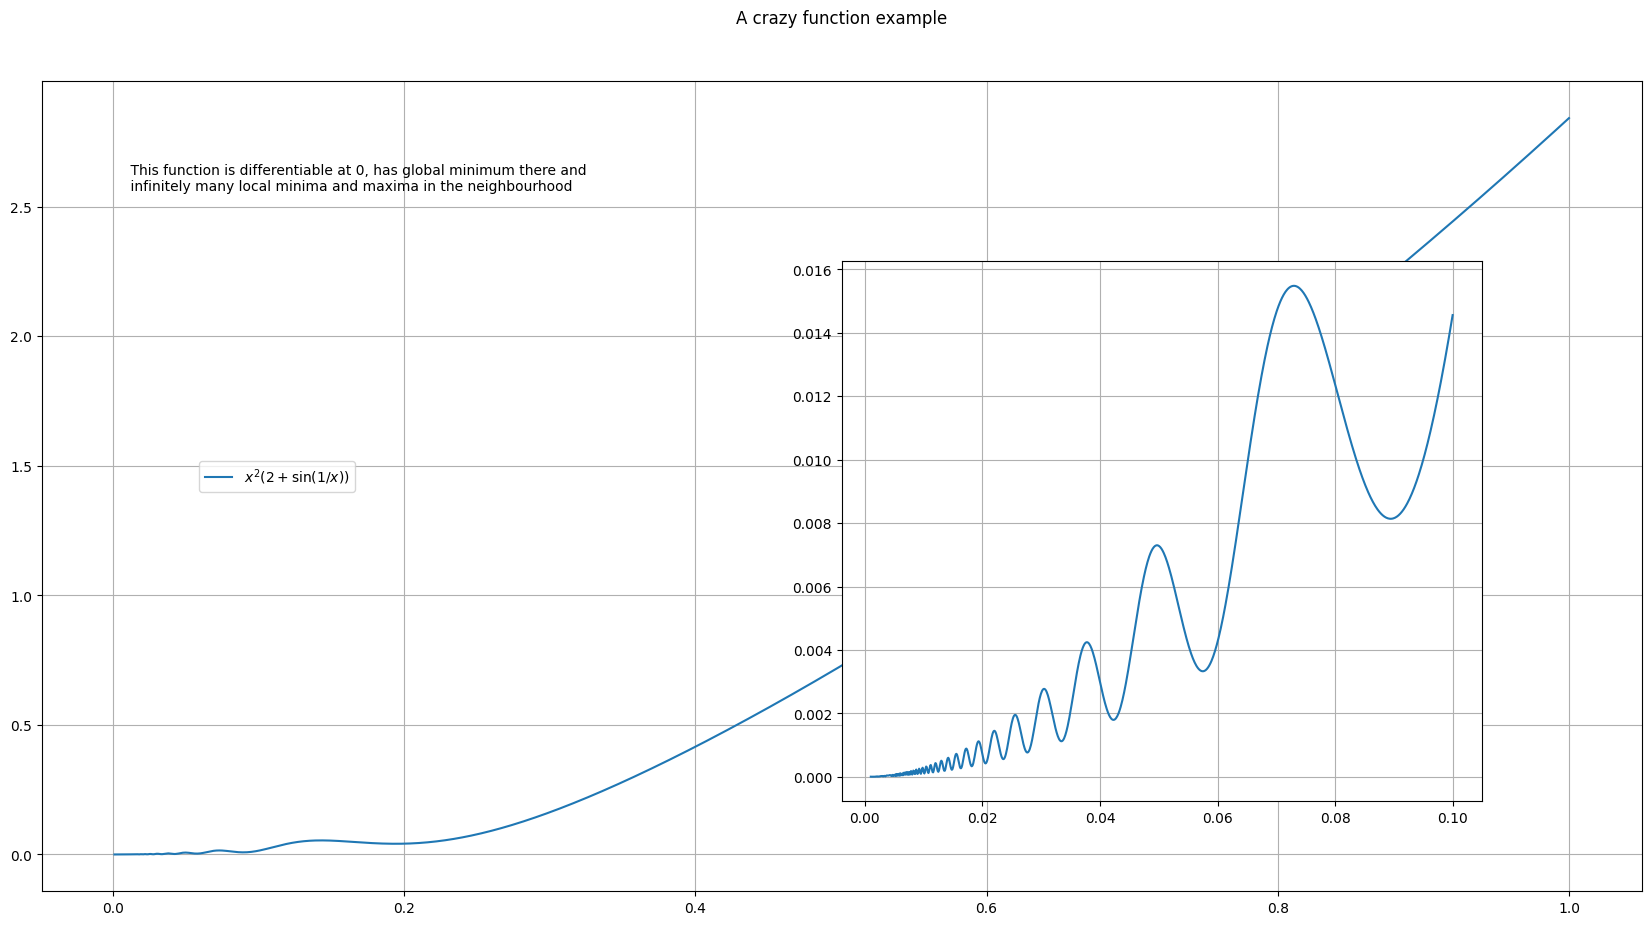

In [ ]:
def crazy_func(x):
    return x * x * (2 + np.sin(1 / x))

fig = plt.figure(figsize=(16, 9))

fig.suptitle('A crazy function example')

# Нарисуем основной график
big_ax = fig.add_axes([0, 0, 1, 0.9])
big_ax.plot(
    np.linspace(0.001, 1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 1, 1000)),
    label='$x^2(2+\sin(1/x))$'
)

big_ax.text(
    0, 2.5,
    '''
    This function is differentiable at 0, has global minimum there and
    infinitely many local minima and maxima in the neighbourhood
    '''
)

big_ax.legend(bbox_to_anchor=(0.2, 0.54))
big_ax.grid(True)

# Нарисуем вспомогательный график
small_ax = fig.add_axes([0.5, 0.1, 0.4, 0.6])
small_ax.plot(
    np.linspace(0.001, 0.1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 0.1, 1000))
)
small_ax.grid(True)


plt.show()
#del crazy_func, fig, big_ax, small_ax

### 3.5. Мультиокна

В предыдущем примере мы создали две области рисования, но их расположение пришлось задавать явно с помощью координат. В большинстве случаев такой точный уровень настройки не нужен. Для этого в matplotlib существуют мультиокна. Во многом они похожи на области рисования. Создавать их можно из объекта Figure с помощью метода add_subplots.

При использовании метода add_subplots рисунок разбивается как таблица на некоторое число строк и столбцов. Возникающие ячейки нигде не рисуются - это удобная абстракция. Далее можно выбрать одну из этих ячеек, и рисовать в ней. Чтобы сделать это надо в функцию subplots передать три числа или трехзначное число. Первая цифра указывает количество строк, вторая - столбцов, третья - порядковый номер ячейки в которой вы хотите рисовать (нумерация начинается с 1 идет слева направо и сверху вниз). Например, вызов fig.add_subplots(3, 3, 7) разобъет рисунок на 9 равных частей и вернет вам ячейку из нижнего левого угла.

Преимущество подхода в том, что вы получаете области рисования одинакового размера не задумываясь о том какие должны быть у них координаты.

[Фигуры Лиссажу](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%B3%D1%83%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D1%81%D0%B0%D0%B6%D1%83)

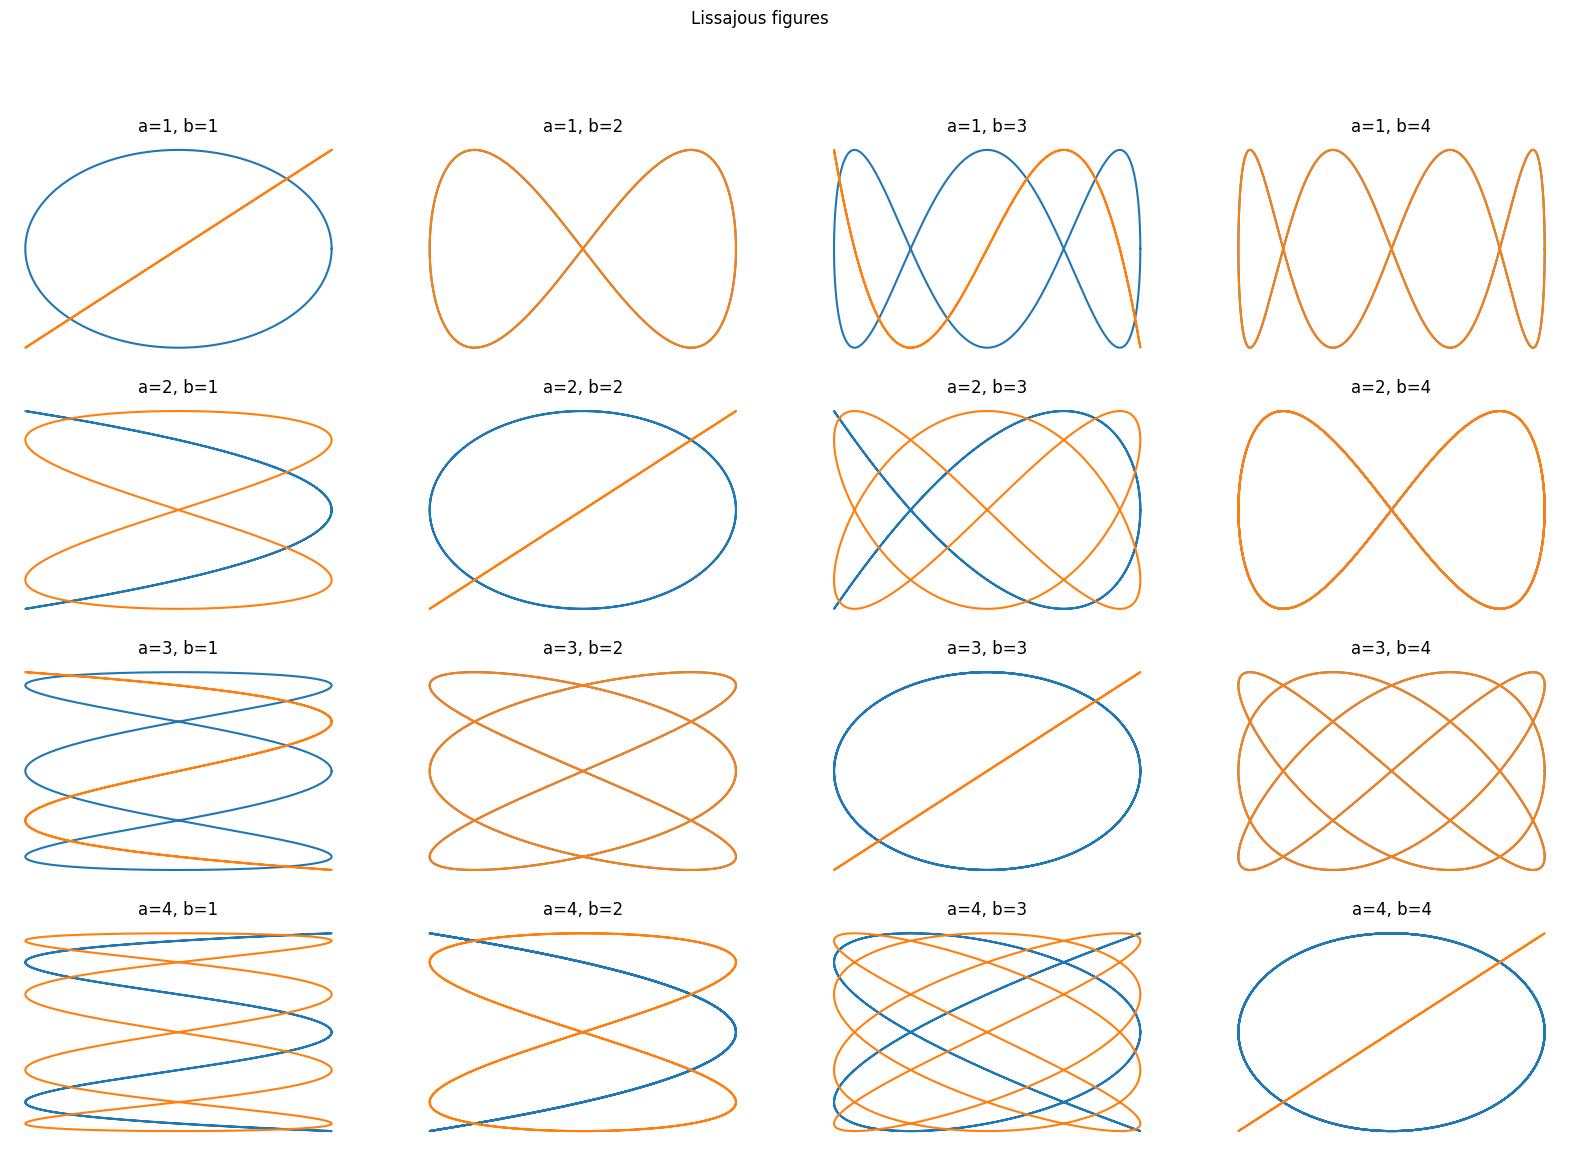

In [ ]:
# Готовим данные
t = np.linspace(0, 2*np.pi, 1000)

# Здесь все как обычно
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Lissajous figures')

nrows = 4
ncols = 4

for a in range(1, nrows + 1):
    for b in range(1, ncols + 1):
        # Выбираем ячейку
        ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos(a*t),
            np.sin(b*t),
        )
        ax.plot(
            np.sin(a*t),
            np.sin(b*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title(f'a={a}, b={b}')

plt.show()

А теперь, как это удобно делать:

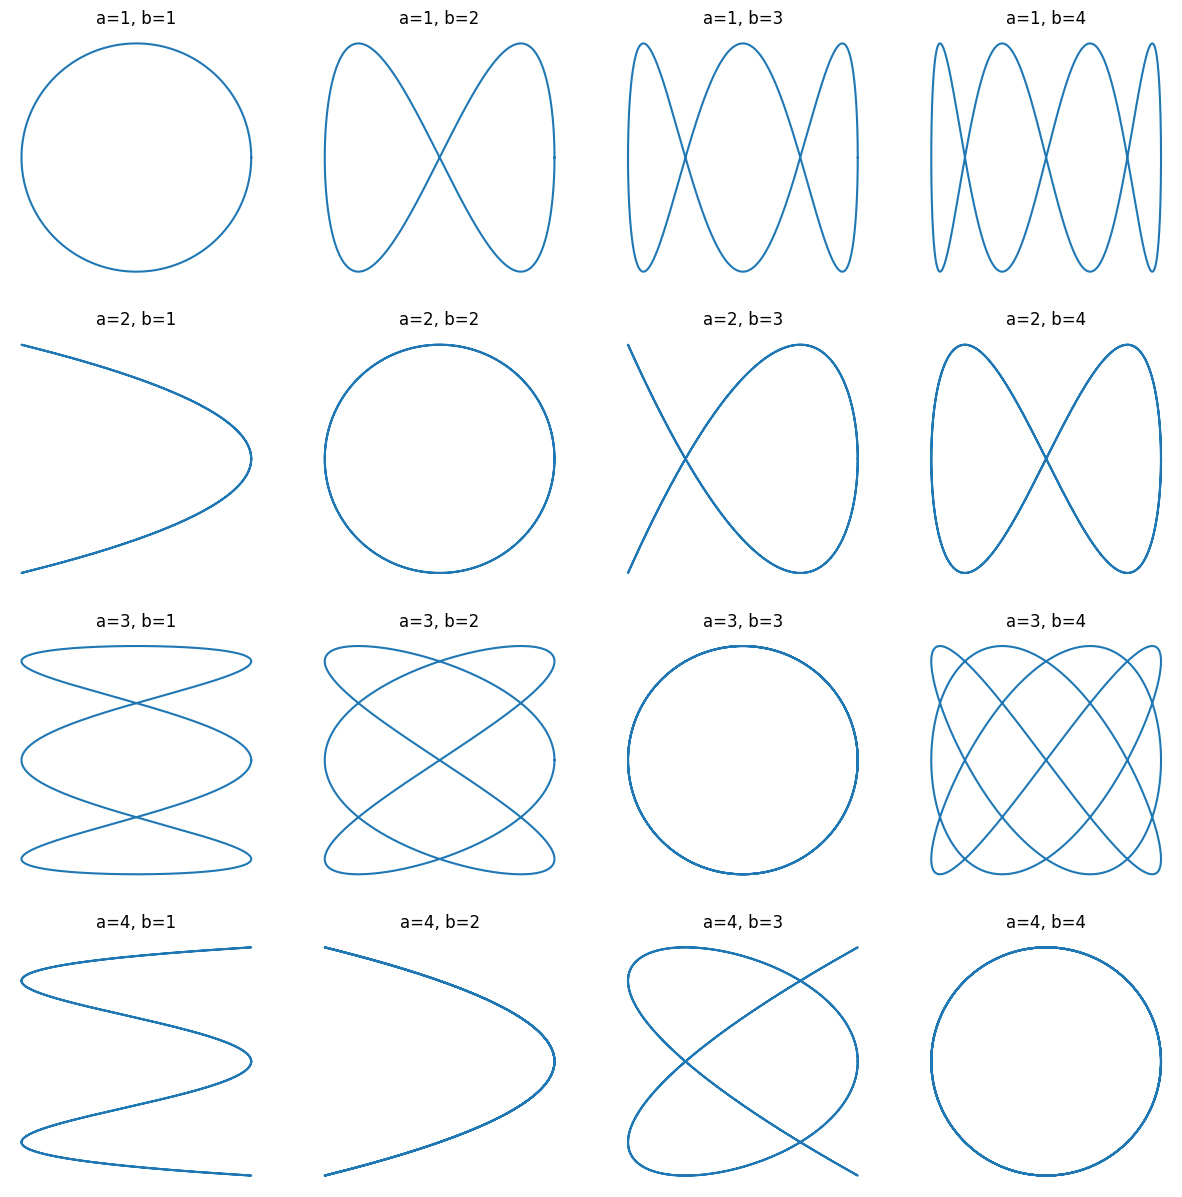

In [ ]:
t = np.linspace(0, 2*np.pi, 1000)

nrows = 4
ncols = 4

figure, axes = plt.subplots(nrows, ncols, figsize=(15,15))

for a in range(nrows):
    for b in range(ncols):
        # Выбираем ячейку
        ax = axes[a][b]
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos((a+1)*t),
            np.sin((b+1)*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title('a={}, b={}'.format(a+1, b+1))

plt.show()

Иногда хочется собрать несколько графиков на одном рисунке, но их размеры должны отличаться. Для этого надо использовать объект GridSpec.

<ipython-input-40-ff0cb299808c>:23: RuntimeWarning: invalid value encountered in arccosh
  func(points),


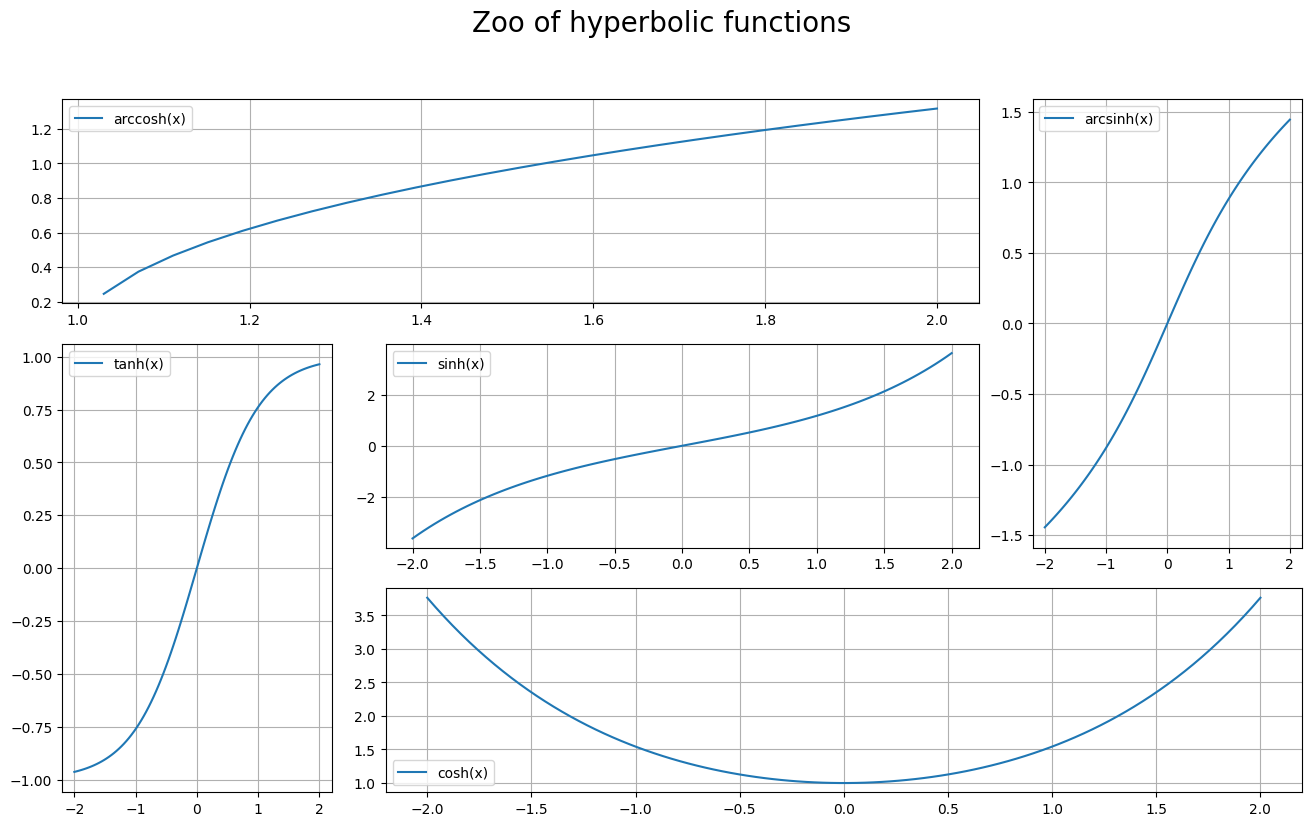

In [ ]:
from matplotlib import gridspec  # GridSpec определен там

# Создаем картинку
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Zoo of hyperbolic functions', fontsize=20)

# Создаем "спеку"
spec = gridspec.GridSpec(nrows=3, ncols=4)
# В метод add_suplot можно передать slicing от спеки.
# Тем самым создастся область рисования занимающая ячейки соответствующие slicing'у
fig.add_subplot(spec[0, :3])  # Добавить область рисования занимающую первые три ячейки первой строки
fig.add_subplot(spec[:2, 3])
fig.add_subplot(spec[2, 1:])
fig.add_subplot(spec[1:, 0])
fig.add_subplot(spec[1, 1:3])

trig_funcs = [np.sinh, np.tanh, np.cosh, np.arcsinh, np.arccosh]
points = np.linspace(-2, 2, 100)

for ax, func in zip(fig.axes, trig_funcs[::-1]):
    ax.plot(
        points,
        func(points),
        label='{}(x)'.format(func.__name__)
    )
    # Выбрать самое "хорошее" расположение для легенды
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### 3.6. Координатные оси

В matplotlib оси координат являются элементом рисунка, а точнее контейнером типа Artist. Примеры - оси $x$, $y$ в декартовой системе координат, оси $r$, $\phi$ в полярной системе координат. Каждая ось содержит три группы графических примитивов: деления осей (ticks), подписи делений (tick lables), подписи осей (axis labels).

Деления на оси бывают главные и вспомогательные. Чтобы получить к ним доступ надо в методе get_ticks в аргумент which передавать 'major' или 'minor'. По умолчанию отображаются только major деления.

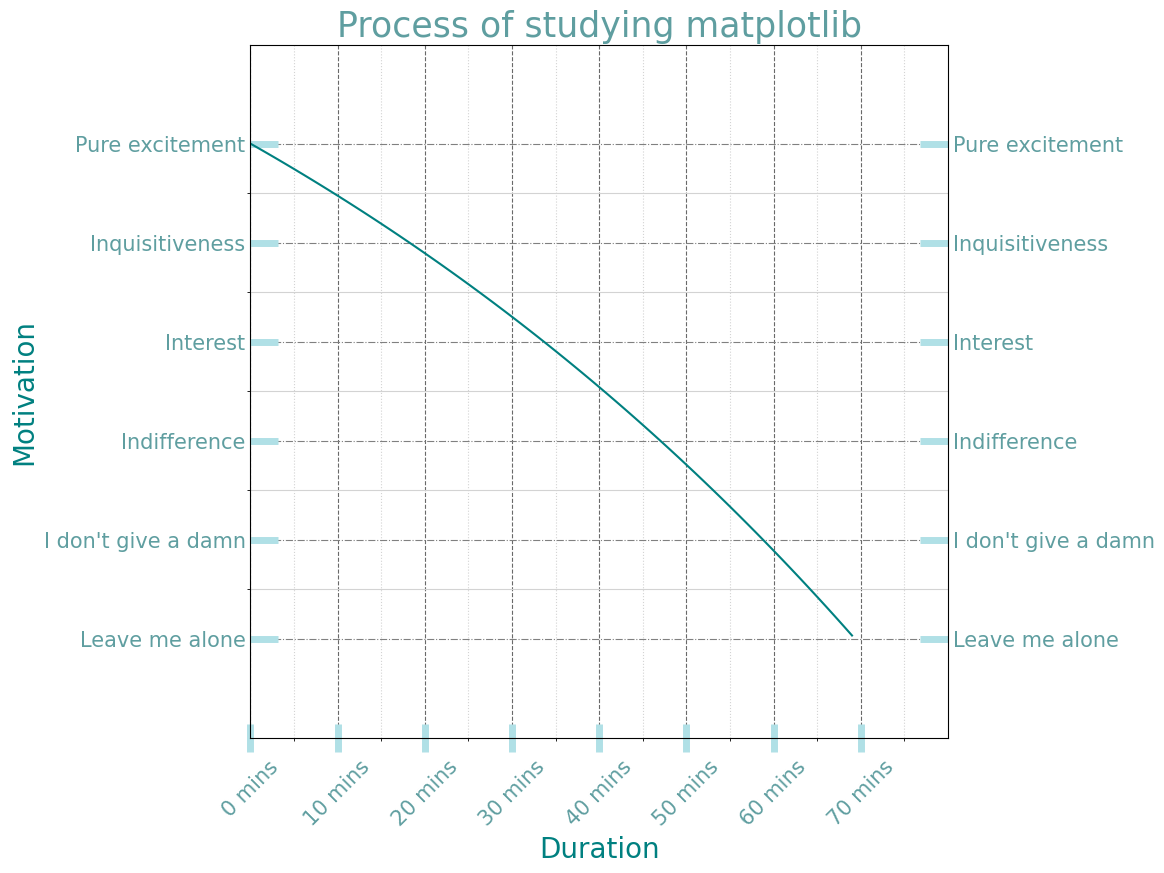

In [ ]:
fig = plt.figure(figsize=(9, 9))
# Здесь мы создаем мультиокно из 1 строки и 1 столбца  выбираем 1-ю ячейку
# Такой вот странный и часто используемый способ создать область рисования
ax = fig.add_subplot(111)
ax.set_title('Process of studying matplotlib', fontsize=25, color='cadetblue')

# Здесь все как обычно - рисуем линию
ax.plot(
    np.arange(70),
    2 - np.exp(0.01 * np.arange(70)),
    color='teal'
)

# Задаем положения вспомогательных делений на оси Х
ax.set_xticks(np.arange(5, 85, 10), minor=True)
# Задаем положения основных делений
ax.set_xticks(np.arange(0, 80, 10))
# Задаем диапазон значений x который будет отрисовываться. Обынчно он шире диапазона делений
ax.set_xlim(0, 80)
# Ставим подписи к основным делениям на оси x
ax.set_xticklabels(
    ['{} mins'.format(t) for t in range(0, 80, 10)],  # текст надписей
    rotation=45,  # угол поворота надписей
    fontsize=15,
    color='cadetblue'
)
# Настраиваем параметры основных делений на оси X
ax.tick_params(
    axis='x',
    which='major',
    direction='inout', # деления будут пересекать ось
    length=20,  # длина делений в точках
    width=5,  # ширина делений в точках
    color='powderblue',
    top=False, bottom=True,  # рисуем делениями только снизу
    labeltop=False, labelbottom=True  # рисуем подписи к делениям только снизу
)

# Для оси Y все настройки аналогичны
ax.set_yticks(np.arange(0.1, 1, 0.2), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(-0.2, 1.2)
ax.set_yticklabels(
    ['Leave me alone', 'I don\'t give a damn', 'Indifference', 'Interest', 'Inquisitiveness', 'Pure excitement'],
    fontsize=15,
    color='cadetblue'
)
ax.tick_params(
    axis='y', which='major',
    direction='in',
    length=20, width=5, color='powderblue',
    left=True, right=True,
    labelleft=True, labelright=True
)

# Делаем подписи к осям
ax.set_xlabel('Duration', color='teal', fontsize=20)
ax.set_ylabel('Motivation', color='teal', fontsize=20)

# Для основных делений оси x мы строим координатную сетку пунктирной линией
ax.grid(True, axis='x', which='major', color='dimgrey', linestyle='--')
# Для вспомогательных делений оси x мы строим координатную сетку сплошной линией более тусклого цвета
ax.grid(True, axis='x', which='minor', color='lightgrey', linestyle=':')
# Аналогично настраиваются параметры для координатной сетки по оси Y
ax.grid(True, axis='y', which='major', color='grey', linestyle='-.')
ax.grid(True, axis='y', which='minor', color='lightgrey', linestyle='-')

plt.show()

При всем том, что ноутбук получился очень большим, мы не обсудили еще очень много тем: глобальные настройки через rcParams, работа со шрифтами, палитры, специальный дизайн шкалы на температурной карте и т.д. и т.п. Если вам понадобятся такие возможности matplotlib, то пора садиться за [серьезные книжки](http://index-of.co.uk/Tutorials/Matplotlib%20for%20Python%20Developers.pdf) или даже [читать документацию](https://matplotlib.org/index.html).

## Галерея примеров

У Matplotlib имеется галерея примеров, чтобы увидеть какие еще графики с его помощью можно получать: https://matplotlib.org/gallery/index.html

#Seaborn

Архитектура `Seaborn` обеспечивает быстрый анализ и визуализацию данных. Она принимает целые фреймы данных или массивы, содержащие ваши данные, и автоматически выполняет все необходимые внутренние функции для семантического отображения и статистической агрегации. Эта библиотека абстрагирует сложность, позволяя вам настраивать графики в соответствии с вашими потребностями.

In [ ]:
import seaborn as sns

Прелесть `Seaborn` в том, что он работает непосредственно с объектами `DataFrame` из `Pandas`, что делает ее очень удобной. Более того, библиотека поставляется с некоторыми встроенными наборами данных, которые можно использовать прямо из кода, и не загружать файлы вручную.

Посмотрим на список датасетов, которые в нём есть:

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Давайте воспользуемся датасетом с пингвинами и попробуем визуализировать некоторые зависимости в датасете.



In [ ]:
penguins_data = sns.load_dataset("penguins")
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Точечный график - Scatter plot

Для построения точечного графика достаточно вызвать метод `scatterplot`:
- В параметре `data` указываем `DataFrame`

- По осям `x` и `y` указываем столбцы, значения которых мы хотим нанести на график

- Параметр `hue` помогает раскрасить признаки объектов в разрезе некоторого другого столбца, в данном примере `species` (виды пингвинов)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

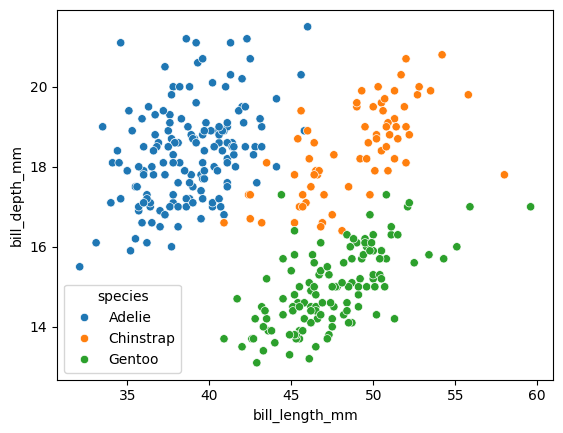

In [ ]:
sns.scatterplot(
                data=penguins_data,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue='species'
               )

В параметре `hue` можно передавать не только категориальные признаки, но и численные.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

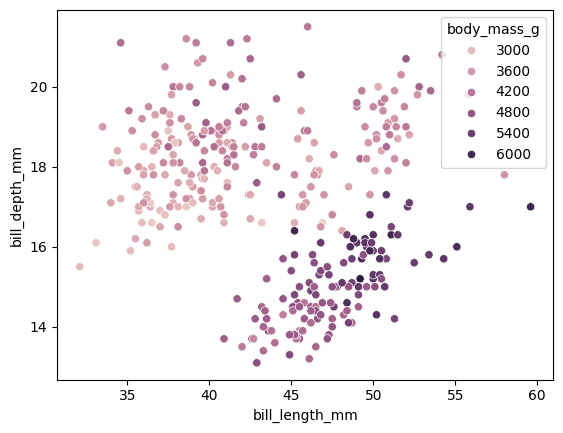

In [ ]:
sns.scatterplot(
                data=penguins_data,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue="body_mass_g"
               )

### Столбчатая диаграмма - Bar plot

Для построения точечного графика достаточно вызвать метод `barplot`:
- В параметре `data` указываем `DataFrame`

- По осям `x` и `y` указываем столбцы, значения которых мы хотим нанести на график

<Axes: xlabel='species', ylabel='body_mass_g'>

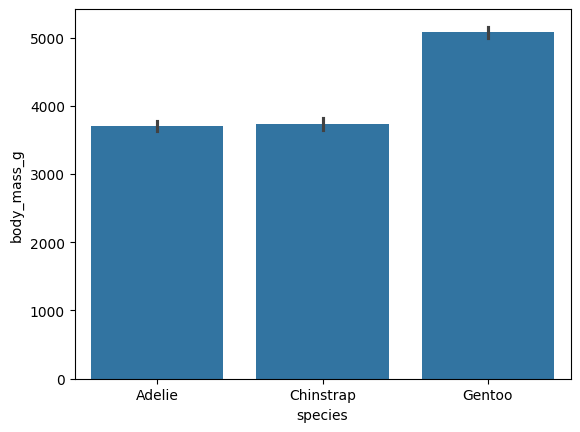

In [ ]:
sns.barplot(
            data=penguins_data,
            x="species",
            y="body_mass_g"
           )

### Гистограмма - Hist plot

Для построения точечного графика достаточно вызвать метод `histplot`:
- В параметре `data` указываем `DataFrame`

- По оси `x` указываем столбец, значения которого мы хотим нанести на график

- Параметр `kde` позволяет построить оценочный график распределения величины

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

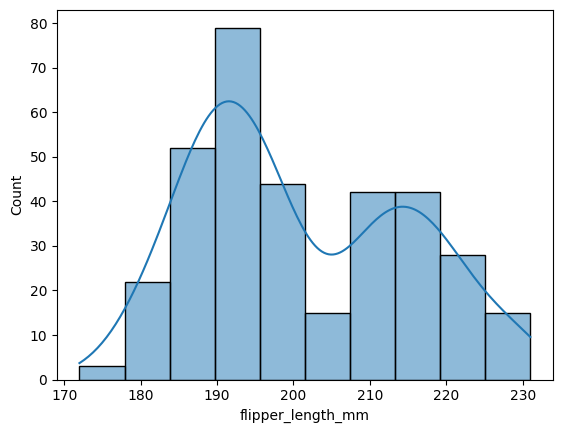

In [ ]:
sns.histplot(
             data=penguins_data,
             x="flipper_length_mm",
             kde=True
            )

В sns очень легко выставить KDE, в отличии от plt, который не умеет делать анализ данных.


Если нужно нарисовать горизонтальный график, достаточно указать столбец в параметре `y`.

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

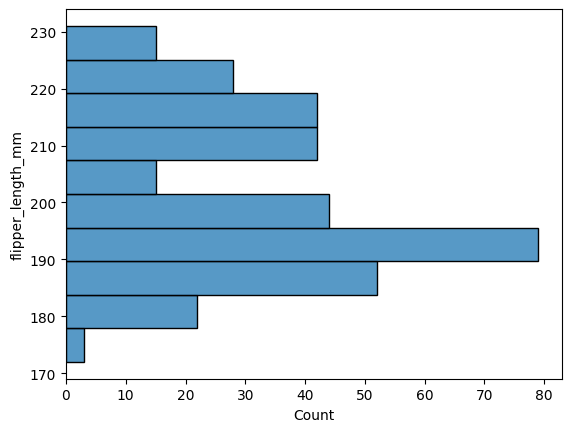

In [ ]:
sns.histplot(data=penguins_data, y="flipper_length_mm")

### Создание красивых графиков с помощью стилей

Seaborn дает возможность менять интерфейс ваших графиков. Для этого из коробки у нас в распоряжении есть пять стилей: `darkgrid`, `whitegrid`, `dark`, `white` и `ticks`.

Пример использования одного из стилей на одном из предыдущих графиков.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

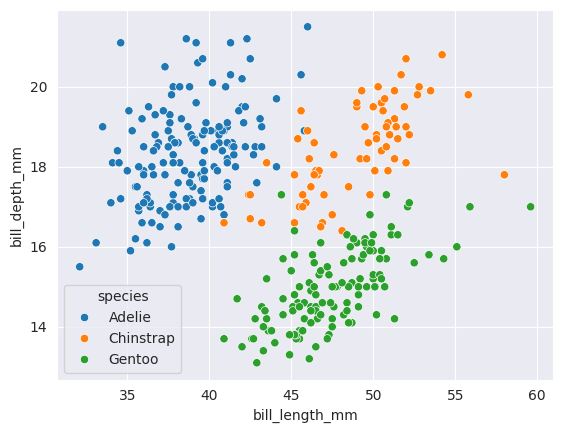

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(data=penguins_data,
                x="bill_length_mm",
                y="bill_depth_mm",
                hue='species')

### Многомерные представления наборов данных



Некоторые функции seaborn объединяют несколько видов графиков для быстрого получения информативных сводок набора данных.

Одна из них, `jointplot()`, фокусируется на одной взаимосвязи. Она отображает совместное распределение между двумя переменными.

- В параметре `data` указываем `DataFrame`

- По оси `x` и `y` указываем столбцы, значения которого мы хотим нанести на график

- Параметр `hue` помогает раскрасить признаки объектов в разрезе некоторого другого столбца

---

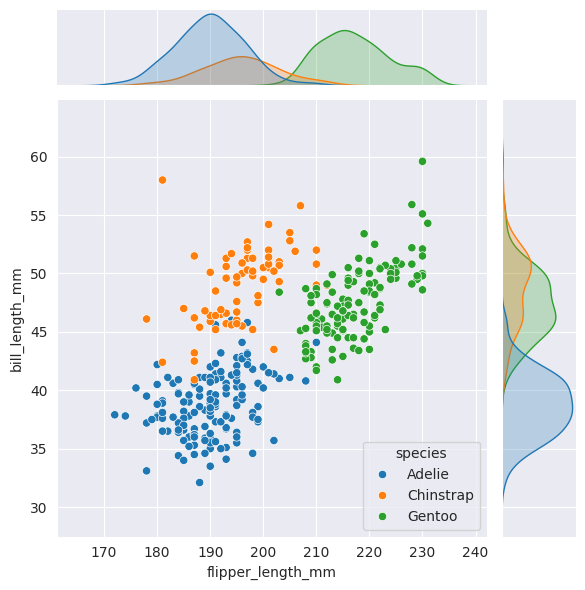

In [ ]:
sns.jointplot(data=penguins_data, x="flipper_length_mm", y="bill_length_mm", hue="species")

Если нужно понять общую картину между всеми столбцами датасета, можно использовать`pairplot()`, нарисует матрицу рассеивания, которая показывает совместное распределение для всех пар столбцов датасета.

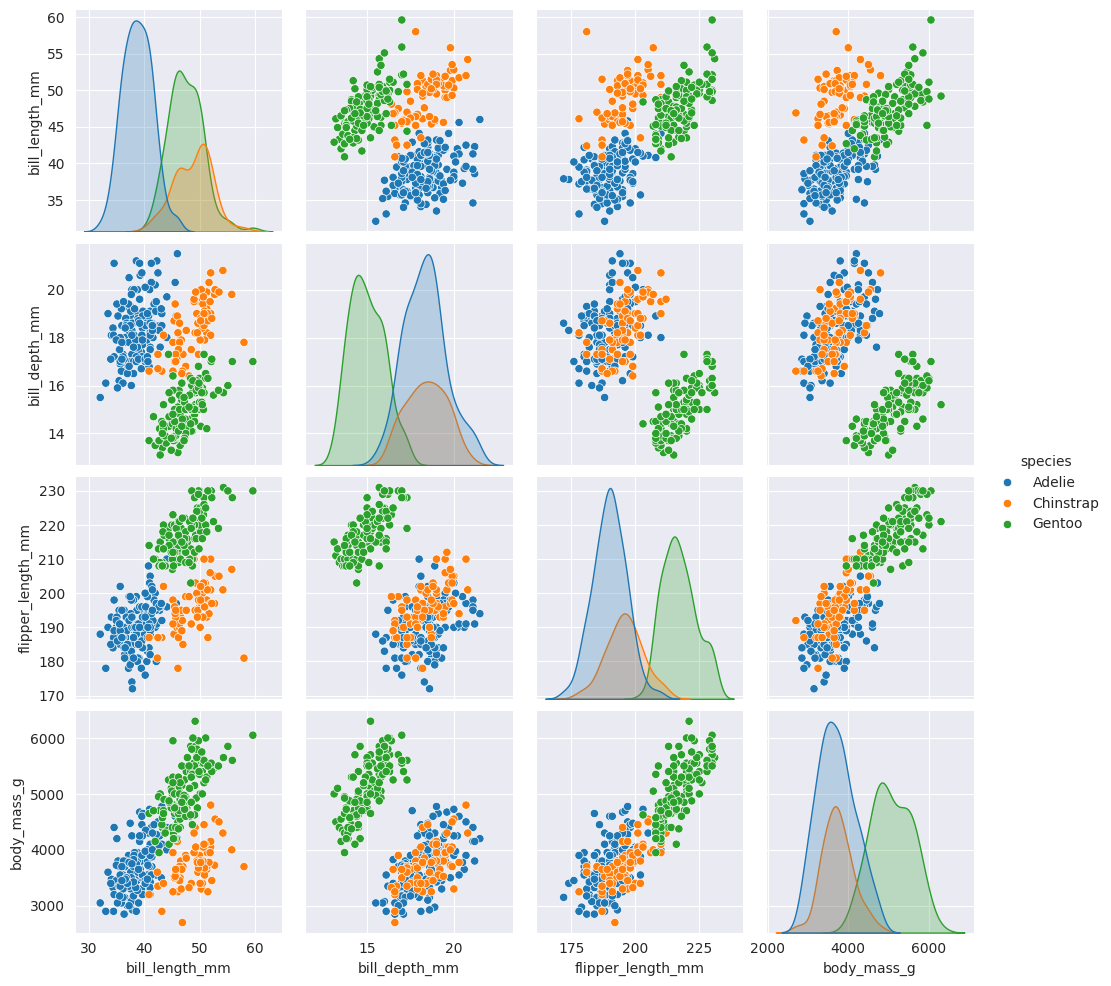

In [ ]:
sns.pairplot(data=penguins_data, hue="species")

### Тепловая карта - Heat map


Иногда стоит оценить корреляцию признаков друг с другом, чтобы понять какие из данных "зависят" друг от друга.
С этим нам поможет метод `heatmap()`.

Для начала вычислим матрицу корреляций для каждого численного столбца датасета

In [ ]:
corr_matrix = penguins_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Теперь подсветим каждую ячейку матрицы с помощью heatmap, чтобы наглядно видеть столбцы, которые сильно коррелируют друг с другом

<Axes: >

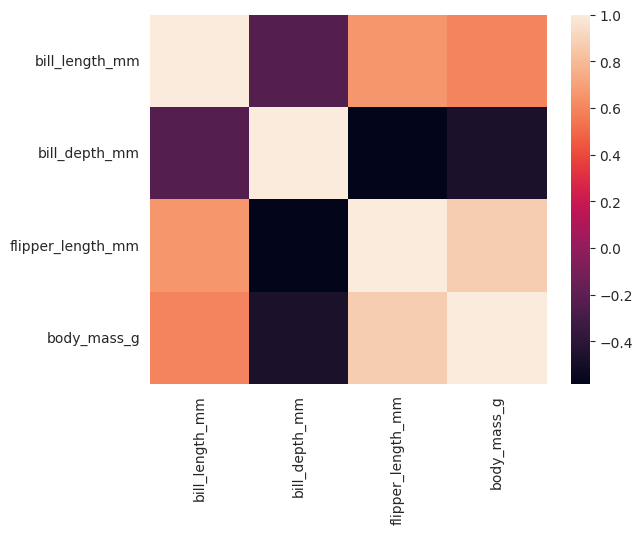

In [ ]:
sns.heatmap(corr_matrix)

На этом функционал библиотеки не ограничивается, это основные графики, которые используются чаще всего.
Seaborn предоставляет больший функционал для визуализации, с которым можно ознакомиться в [официальной документации](https://seaborn.pydata.org/).


Пример сложного графика, который реализуется одной командой

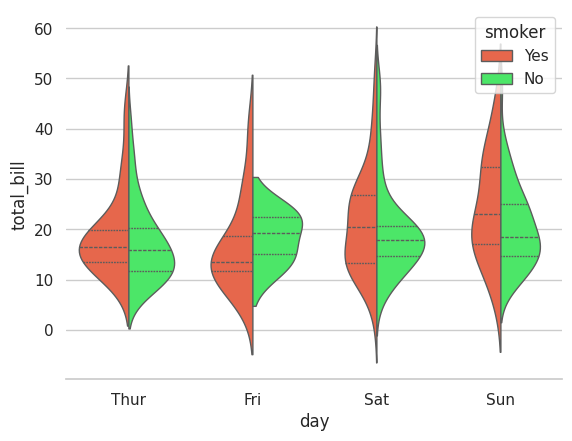

In [ ]:
# Подгружаем seaborn и задаем стиль темы
import seaborn as sns
sns.set_theme(style="whitegrid")

# Загружаем выборочный набор данных
tips = sns.load_dataset("tips")

# Используем пользовательский список цветов (одинаковая длина и количество категорий)
custom_palette = ["#FF5733", "#33FF57"]

# Используйте различные предопределенные цветовые палитры для отображения сгруппированных скрипичных диаграмм
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette=custom_palette) # Одна команда

sns.despine(left=True)
plt.show()

# Plotly

`Plotly` - это библиотека для визуализации данных на на `Python` однако в отличие от `Seaborn` и `Matplotlib`, она позволяет изучать данные «на лету» (не перестраивая график в `Matplotlib`, изменяя масштаб, включая/выключая какие-то данные), а также построить полноценный интерактивный отчёт (dashboard).


`Plotly` состоит из нескольких частей:

- Front-End на `JS`
- Back-End на `Python` (за основу взята библиотека `Seaborn`)
- Back-End на `R`

In [ ]:
import plotly.graph_objs as go
import numpy as np

Чтобы нарисовать примитивный график параболы достаточно:
- создать объект fig (полотно на который будем наносить графики) c помощью  `go.Figure()`
- методом `add_trace` добавить рисовалку `go.Scatter(x, y)` (график получится не точечный, а линейный)
- показать график с помощью метода `show`

In [ ]:
x = np.arange(-2, 2, 0.1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x**2))
fig.show()

График получился интерактивный, если навести на него курсор, то можно его приближать и удалять, выделять участки, по наведению курсора на точку получать подробную информацию, возвращать картинку в исходное положение, а при необходимости «скриншотить» и сохранять как файл.

Если нужно нанести на график несколько кривых, достаточно методом `add_trace` добавить все графики, которые нужно отобразить.

А также добавим названия графикам, чтобы красиво отобразить легенду. Для этого в параметре name указываем функцию в формате `LATEX`. Для более красивого отображения легенды можно перенести её в любую часть полотна с помощью метода `update_layout`.

In [ ]:
x = np.arange(-2, 2, 0.1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x**2, name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", legend=dict(x=.5, xanchor="center"))
fig.show()

###3D графики

Создание 3D графиков не отличается от 2D, нам нужно лишь добавить третий массив данных для оси `z` и выбрать метод `Surface`, в случае, если например нужно нарисовать 3-ех мерную поверхность.

In [ ]:
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

fig = go.Figure()
fig.add_trace(go.Surface(x=x, y=y, z=z))

fig.show()

И так далее графики можно и дальше кастомизировать и улучшать их визуал, однако plotly предоставляет еще большую абстракцию для построения графиков и также, как `Seaborn` умеет работать с объектами `Pandas`. Рассмотрим примеры.


Будем работать с объектами

In [ ]:
from plotly import express as px

Также как и в `Seaborn` в `Plotly` существуют предзагруженные данные, воспользуемся датасетом Ириса Фишера и построим графики на его основе.

In [ ]:
iris_data = px.data.iris()
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


**Все графики ниже будут интерактивными,можно наводить мышкой на объекты и получать информацию по каждому из них.**

### Точечный график - scatter


Используем метод `scatter()` для нанесения точек на график, набор параметров не сильно меняется по сравнению с `Seaborn`, вместо параметра `hue`, используется параметр `color`, все остальные параметры идентичны.

In [ ]:
fig = px.scatter(iris_data, x="petal_length", y='petal_width', color='species')
fig.show()

### Круговая диаграмма - pie

Используем метод `scatter()` для диаграммы, Seaborn из коробки не поставляет такой тип графика, поэтому сранивать можно только с `matplotlib`

Параметр `color_discrete_sequence` отвечает за цветовую палитру, есть палитры из коробки (как в примере ниже), а можно и самому внести туда цвета для каждого объекта (группы объектов) графика.

In [ ]:
fig = px.pie(iris_data, names="species", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Тепловая карта - imshow

Также как и в `Seaborn` в `Plotly` есть возможность создавать тепловую карту для матрицы корреляций признаков.

In [ ]:
corr_matrix = iris_data[['sepal_length','sepal_width','petal_length', 'petal_width']].corr()

fig = px.imshow(corr_matrix, color_continuous_scale='Blues', text_auto=True)
fig.show()
